<a href="https://colab.research.google.com/github/NPCA-TEAM/COVID-19/blob/main/Scripts/INTEGRAR_DADOS_covid_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação e importação de bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 150 kB 24.5 MB/s 


In [ ]:
import os
import glob
import pandas as pd # dataframes
import numpy as nd
import matplotlib.pyplot as plt # plotagem dos dados
import os
import time
from datetime import datetime, timedelta, date

# **CASOS**

#Leitura e visualização dos dados

##Casos média móvel Atual, 7 Dias, 14 Dias

In [ ]:
#Seleciona os arquivos de CASOS recentemente baixado da pasta de .CSVs (LakeData)
pasta = '/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/' 
lista_de_arquivos_casos = glob.glob(pasta+'*') 
print(*lista_de_arquivos_casos, sep = '\n')
print('-----------------------------------------------------------------------------')

/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_16_12_2021.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_01_12_2021.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_11_12_2021.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_23_12_2021.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_07_01_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_09_01_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_30_01_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_21_02_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_22_02_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_23_02_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_24_02_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_25_02_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_26_02_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/

In [ ]:
#Indice dos arquivos na lista ordenada. ALTERAR NUMEROS PARA 7 E 14 QUANDO TIVERMOS AO MENOS 15 ARQUIVOS NA PASTA
indice_Setimo_dia_casos = 7
indice_DecimoQuarto_dia_casos = 14

#Ordena arquivos por data de criação do arquivo. Ultimo arquivo a ser criado começa no inicio da lista.
lista_de_arquivos_ordenados_casos= sorted(lista_de_arquivos_casos,key=os.path.getctime,reverse=True)
print(*lista_de_arquivos_ordenados_casos,sep = "\n")
print('---------------------------------------------------------------------------')

/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_31_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_30_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_29_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_28_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_27_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_26_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_25_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_24_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_23_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_22_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_21_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_20_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_19_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/

In [ ]:
#Seleciona o ultimo arquivo que foi criado e adicioado na pasta
arquivo_atual_casos = lista_de_arquivos_ordenados_casos[0]
#Seleciona o setimo arquivo que foi criado depois do ultimo arquivo adicionado na pasta
arquivo_7dias_casos = lista_de_arquivos_ordenados_casos[indice_Setimo_dia_casos]
#Seleciona o decimo quarto arquivo que foi criado depois do ultimo arquivo adicionado na pasta
arquivo_14dias_casos = lista_de_arquivos_ordenados_casos[indice_DecimoQuarto_dia_casos]

print('--------------------------------------------------------------------------------')
print(arquivo_atual_casos)
print(arquivo_7dias_casos)
print(arquivo_14dias_casos)

--------------------------------------------------------------------------------
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_31_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_24_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Casos/MMC_PA_17_12_2022.csv


In [ ]:
#Importando arquivos
casos_media_movel_atual = pd.read_csv(arquivo_atual_casos, parse_dates=['data'])
casos_media_movel_atual.info()

casos_media_movel_7dias = pd.read_csv(arquivo_7dias_casos, parse_dates=['data'])
casos_media_movel_7dias.info()

casos_media_movel_14dias = pd.read_csv(arquivo_14dias_casos, parse_dates=['data'])
casos_media_movel_14dias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   data                          1036 non-null   datetime64[ns, pytz.FixedOffset(-180)]
 1   Qtd. pela data do sintoma     1036 non-null   float64                               
 2   Qtd. pela data da publicação  1036 non-null   float64                               
dtypes: datetime64[ns, pytz.FixedOffset(-180)](1), float64(2)
memory usage: 24.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   data                          1029 non-null   datetime64[ns, pytz.Fix

#Porcentagem de vacinação: primeira, segunda e terceira dose.

            data  Vacinacao_Dose1_PA  Vacinacao_Dose2_PA  Vacinacao_Dose3_PA
176   2020-03-18                 NaN                 NaN                 NaN
198   2020-03-19                 NaN                 NaN                 NaN
224   2020-03-20                 NaN                 NaN                 NaN
251   2020-03-21                 NaN                 NaN                 NaN
279   2020-03-22                 NaN                 NaN                 NaN
...          ...                 ...                 ...                 ...
28559 2022-12-27             79.8519            75.45159            28.97859
28587 2022-12-28             79.8519            75.45159            28.97859
28615 2022-12-29             79.8519            75.45159            28.97859
28643 2022-12-30             79.8519            75.45159            28.97859
28671 2022-12-31             79.8519            75.45159            28.97859

[1019 rows x 4 columns]


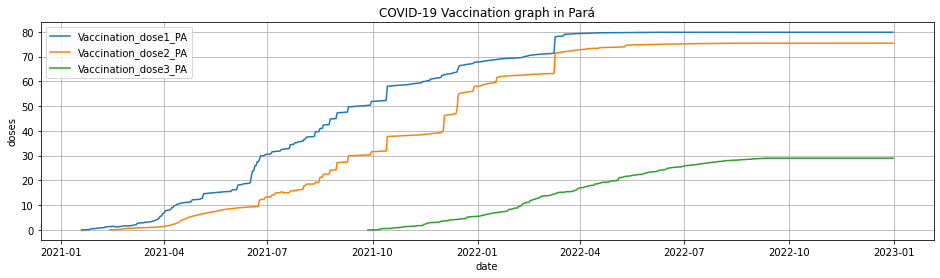

In [ ]:
# importando os dados da COVID diretamente do GitHub
dados = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

# alterar a coluna de data para o formato de data e hora
dados['date'] = pd.to_datetime(dados['date'])

# Filtrando os dados do Braisl, e mostrando apenas as colunas especificas:
dados_PA_vacinados = dados.query("state == 'PA'")[['date', 
                                                   'vaccinated_per_100_inhabitants',
                                                   'vaccinated_second_per_100_inhabitants',
                                                   'vaccinated_third_per_100_inhabitants']]

dados_PA_vacinados.columns=['data','Vacinacao_Dose1_PA','Vacinacao_Dose2_PA','Vacinacao_Dose3_PA']

# imprimindo todas as colunas disponiveis
#print(dados.columns)

# Imprimindo os dados:
#dados_PA_vacinados.plot.line(title='Vaccination doses in Pará', x="data", y= ['Vacinacao_dose1_PA',
#                                                                              'Vacinacao_dose2_PA',
#                                                                             'Vacinacao_dose3_PA'], figsize=(16,4)).grid();

plt.figure(figsize=(16, 4))
plt.grid()
plt.xlabel('date')
plt.ylabel('doses')
plt.title('COVID-19 Vaccination graph in Pará')
plt.plot(dados_PA_vacinados['data'], dados_PA_vacinados['Vacinacao_Dose1_PA'], label='Vaccination_dose1_PA')
plt.plot(dados_PA_vacinados['data'], dados_PA_vacinados['Vacinacao_Dose2_PA'], label='Vaccination_dose2_PA')
plt.plot(dados_PA_vacinados['data'], dados_PA_vacinados['Vacinacao_Dose3_PA'], label='Vaccination_dose3_PA')
plt.legend()

# Salvando o gráfico em PNG:
plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Vaccination doses in Pará - Data collected day {date.today()}.png', dpi=300, transparent=True, bbox_inches='tight')

# Imprimindo o dataframe:
print(dados_PA_vacinados)

# Tratamento dos dados

##Tratamento para casos média móvel 

            Casos_DataSintoma_MM_atual_PA  Casos_Publicacao_MM_atual_PA
data                                                                   
2020-03-01                      20.571429                      0.000000
2020-03-02                      26.285714                      0.000000
2020-03-03                      35.714286                      0.000000
2020-03-04                      40.142857                      0.000000
2020-03-05                      68.000000                      0.000000
...                                   ...                           ...
2022-12-27                      16.571429                    144.857143
2022-12-28                      13.428571                    138.571429
2022-12-29                      10.000000                    117.571429
2022-12-30                       8.285714                    121.571429
2022-12-31                       7.142857                    122.142857

[1036 rows x 2 columns]


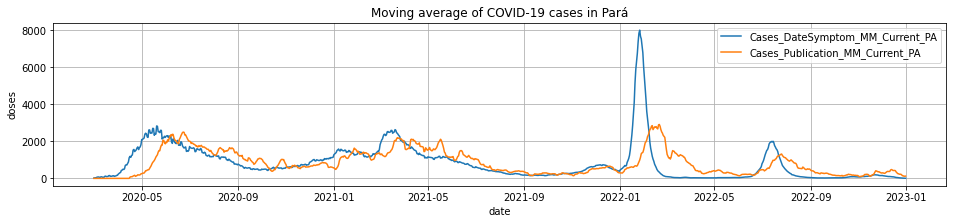

In [ ]:
#     PARA O DIA ATUAL - CASOS

# Filtrando apenas a data e retirando o horario:
casos_media_movel_atual['data'] = pd.to_datetime(casos_media_movel_atual['data'].dt.strftime('%Y-%m-%d'))

# Tornando Data em indice:
casos_media_movel_atual = casos_media_movel_atual.set_index('data')

#Alterando nome das colunas
casos_media_movel_atual = casos_media_movel_atual.rename(columns={'Qtd. pela data da publicação':'Casos_Publicacao_MM_atual_PA','Qtd. pela data do sintoma':'Casos_DataSintoma_MM_atual_PA'})                                                            
                                
# Plotando os dados:
strDiaColetado = str(casos_media_movel_atual.index[-1])
strDiaColetado = strDiaColetado.split(" ")[0]
#casos_media_movel_atual.plot.line(title=f'Moving average of COVID-19 cases in Pará - Data collected daily {strDiaColetado}', figsize=(16,3)).grid()

# Plotando os dados:
plt.figure(figsize=(16, 3))
plt.grid()
plt.xlabel('date')
plt.ylabel('doses')
#plt.title(f'Moving average of COVID-19 cases in Pará - Data collected day {strDiaColetado}')
plt.title(f'Moving average of COVID-19 cases in Pará')
plt.plot(casos_media_movel_atual['Casos_DataSintoma_MM_atual_PA'], label='Cases_DateSymptom_MM_Current_PA')
plt.plot(casos_media_movel_atual['Casos_Publicacao_MM_atual_PA'], label='Cases_Publication_MM_Current_PA')
plt.legend()

print(casos_media_movel_atual) 

# Salvando o frafico em PNG:
plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Moving average of cases in Pará - Data collected day {strDiaColetado}.png', dpi=300, transparent=True, bbox_inches='tight')     
#plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Moving average of cases in Pará - Data collected day  {date.today()}.png', dpi=300, transparent=True, bbox_inches='tight')

            Casos_DataSintoma_MM_7dias_PA  Casos_Publicacao_MM_7dias_PA
data                                                                   
2020-03-01                      20.571429                      0.000000
2020-03-02                      26.285714                      0.000000
2020-03-03                      35.714286                      0.000000
2020-03-04                      40.142857                      0.000000
2020-03-05                      68.000000                      0.000000
...                                   ...                           ...
2022-12-20                      27.571429                    300.857143
2022-12-21                      23.000000                    259.428571
2022-12-22                      16.000000                    251.714286
2022-12-23                      11.285714                    225.428571
2022-12-24                       9.571429                    223.714286

[1029 rows x 2 columns]


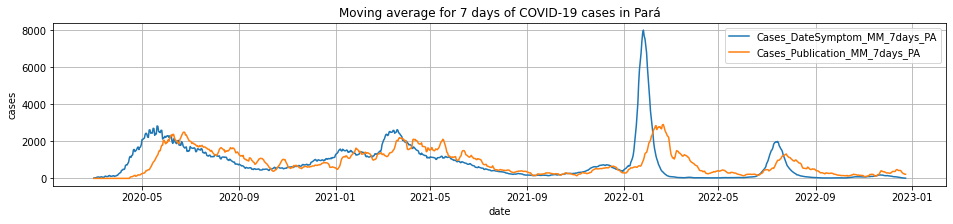

In [ ]:
#      PARA 7 DIAS - CASOS

# Filtrando apenas a data e retirando o horario
casos_media_movel_7dias['data'] = pd.to_datetime(casos_media_movel_7dias['data'].dt.strftime('%Y-%m-%d'))

# Tornando Data em indice:
casos_media_movel_7dias = casos_media_movel_7dias.set_index('data')

#Alterando nome das colunas
casos_media_movel_7dias = casos_media_movel_7dias.rename(columns={'Qtd. pela data da publicação':'Casos_Publicacao_MM_7dias_PA','Qtd. pela data do sintoma':'Casos_DataSintoma_MM_7dias_PA'})

                                                                                                    #Tradução para Ingles:
                                                                                                    #Cases_Publication_Moving_Average_7_days_PA
                                                                                                    #Cases_of_Moving_Average_Symptom_7_days_PA
                                                                                                                                                                                             

# Plotando os dados:
strDiaColetado = str(casos_media_movel_7dias.index[-1])
strDiaColetado = strDiaColetado.split(" ")[0]
#casos_media_movel_7dias.plot.line(title=f'Moving average of COVID-19 cases in Pará - Data collected daily {strDiaColetado}\n', figsize=(16,3)).grid()

                                                                                                    #Tradução para Ingles:
                                                                                                    #Moving average of COVID-19 cases in Pará - Data collected daily
# Plotando os dados:
plt.figure(figsize=(16, 3))
plt.grid()
plt.xlabel('date')
plt.ylabel('cases')
#plt.title(f'Moving average for 7 days of COVID-19 cases in Pará - Data collected day {strDiaColetado}')
plt.title(f'Moving average for 7 days of COVID-19 cases in Pará')
plt.plot(casos_media_movel_7dias['Casos_DataSintoma_MM_7dias_PA'], label='Cases_DateSymptom_MM_7days_PA')
plt.plot(casos_media_movel_7dias['Casos_Publicacao_MM_7dias_PA'], label='Cases_Publication_MM_7days_PA')
plt.legend()

print(casos_media_movel_7dias)  

# Salvando o frafico em PNG:
plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Moving average for 7 days of COVID-19 cases in Pará - Data collected day {strDiaColetado}.png', dpi=300, transparent=True, bbox_inches='tight')
#plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Moving average for 7 days of COVID-19 cases in Pará - Data collected day  {date.today()}.png', dpi=300, transparent=True, bbox_inches='tight')

            Casos_DataSintoma_MM_14dias_PA  Casos_Publicacao_MM_14dias_PA
data                                                                     
2020-03-01                       20.571429                       0.000000
2020-03-02                       26.285714                       0.000000
2020-03-03                       35.714286                       0.000000
2020-03-04                       40.142857                       0.000000
2020-03-05                       68.000000                       0.000000
...                                    ...                            ...
2022-12-13                       47.000000                     478.714286
2022-12-14                       40.571429                     458.142857
2022-12-15                       34.142857                     424.714286
2022-12-16                       26.571429                     429.285714
2022-12-17                       18.714286                     428.714286

[1022 rows x 2 columns]


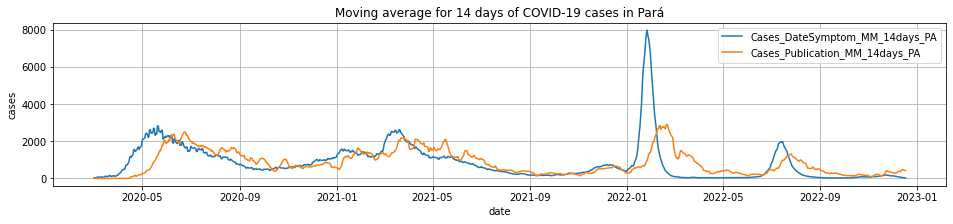

In [ ]:
#         PARA 14 DIAS - CASOS

# Filtrando apenas a data e retirando o horario:
casos_media_movel_14dias['data'] = pd.to_datetime(casos_media_movel_14dias['data'].dt.strftime('%Y-%m-%d'))

# Tornando Data em indice:
casos_media_movel_14dias = casos_media_movel_14dias.set_index('data')

#Alterando nome das colunas
casos_media_movel_14dias = casos_media_movel_14dias.rename(columns={'Qtd. pela data da publicação':'Casos_Publicacao_MM_14dias_PA','Qtd. pela data do sintoma':'Casos_DataSintoma_MM_14dias_PA'})
                                                                                 

#Plotando os dados:
strDiaColetado = str(casos_media_movel_14dias.index[-1])
strDiaColetado = strDiaColetado.split(" ")[0]
#casos_media_movel_14dias.plot.line(title=f'Moving average of COVID-19 cases in Pará - Data collected daily {strDiaColetado,} \n', figsize=(16,3)).grid()

                                                                                                    #Tradução para Ingles:
                                                                                                    #Moving average of COVID-19 cases in Pará - Data collected daily
# Plotando os dados:
plt.figure(figsize=(16, 3))
plt.grid()
plt.xlabel('date')
plt.ylabel('cases')
#plt.title(f'Moving average for 14 days of COVID-19 cases in Pará - Data collected day {strDiaColetado}')
plt.title(f'Moving average for 14 days of COVID-19 cases in Pará')
plt.plot(casos_media_movel_14dias['Casos_DataSintoma_MM_14dias_PA'], label='Cases_DateSymptom_MM_14days_PA')
plt.plot(casos_media_movel_14dias['Casos_Publicacao_MM_14dias_PA'], label='Cases_Publication_MM_14days_PA')
plt.legend()

print(casos_media_movel_14dias)         

# Salvando o frafico em PNG: 
plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Moving average for 14 days of COVID-19 cases in Pará - Data collected day {strDiaColetado}.png', dpi=300, transparent=True, bbox_inches='tight')
#plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Moving average for 14 days of COVID-19 cases in Pará - Data collected day  {date.today()}.png', dpi=300, transparent=True, bbox_inches='tight')

## Ocultar

In [ ]:
#-------PARA O DIA ATUAL CASOS--------

# Filtrando apenas a data e retirando o horario
#casos_media_movel_atual['data'] = pd.to_datetime(casos_media_movel_atual['data'].dt.strftime('%Y-%m-%d'))
# Tornando Data em indice:
#casos_media_movel_atual = casos_media_movel_atual.set_index('data')
#Alterando nome das colunas
    #casos_media_movel_atual = casos_media_movel_atual.rename(columns={'data':'date','Qtd. pela data da publicação':'Cases_Publication_Current_Moving_Average_PA','Qtd. pela data do sintoma':'Cases_Date_Symptom_Current_Moving_Average_PA'})
#casos_media_movel_atual = casos_media_movel_atual.rename(columns={"Qtd. pela data da publicação":"Casos_Publicacao_MM_atual_PA","Qtd. pela data do sintoma":"Casos_DataSintoma_MM_atual_PA"})

                                                                                                    #Tradução para Ingles:
                                                                                                    #Cases_Publication_Current_Moving_Average_PA
                                                                                                    #Cases_Date_Symptom_Current_Moving_Average_PA

# Plotando os dados:
#strDiaColetado = str(casos_media_movel_atual.index[-1])
#strDiaColetado = strDiaColetado.split(" ")[0]
#casos_media_movel_atual.plot.line(title=f'Moving average of COVID-19 cases in Pará - Data collected daily {strDiaColetado}', figsize=(16,3)).grid()
    #casos_media_movel_atual.plot.line(title=f'Média móveis de casos de COVID-19 no Pará - Dados coletados dia {strDiaColetado}', figsize=(16,3)).grid()

                                                                                                    #Tradução para Ingles:
                                                                                                    #Moving average of COVID-19 cases in Pará - Data collected daily

# SALVANDO AS IMAGEM DO GRAFICO
#plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/teste/Média móveis de casos de COVID-19 no Pará - Dados coletados dia {strDiaColetado}.png', dpi=300, transparent=True, bbox_inches='tight')                                                                                                  #Moving average of COVID-19 cases in Pará - Data collected daily

#####################################################################################################################################################################################################################################################################

#      PARA 7 DIAS

# Filtrando apenas a data e retirando o horario
#casos_media_movel_7dias['data'] = pd.to_datetime(casos_media_movel_7dias['data'].dt.strftime('%Y-%m-%d'))
# Tornando Data em indice:
#casos_media_movel_7dias = casos_media_movel_7dias.set_index('data')
#Alterando nome das colunas
    #casos_media_movel_7dias = casos_media_movel_7dias.rename(columns={'Qtd. pela data da publicação':'Cases_Publication_Moving_Average_7_days_PA','Qtd. pela data do sintoma':'Cases_of_Moving_Average_Symptom_7days_PA'})
#casos_media_movel_7dias = casos_media_movel_7dias.rename(columns={'Qtd. pela data da publicação':'Casos_Publicacao_MM_7dias_PA','Qtd. pela data do sintoma':'Casos_DataSintoma_MM_7dias_PA'})

                                                                                                    #Tradução para Ingles:
                                                                                                    #Cases_Publication_Moving_Average_7_days_PA
                                                                                                    #Cases_of_Moving_Average_Symptom_7_days_PA
                                                                                                    
# Plotando os dados:
#strDiaColetado = str(casos_media_movel_7dias.index[-1])
#strDiaColetado = strDiaColetado.split(" ")[0]
#casos_media_movel_7dias.plot.line(title=f'Moving average of COVID-19 cases in Pará - Data collected daily {strDiaColetado}\n', figsize=(16,3)).grid()
#casos_media_movel_7dias.plot.line(title=f'Média móveis de casos de COVID-19 no Pará - Dados coletados dia {strDiaColetado}\n', figsize=(16,3)).grid()

                                                                                                    #Tradução para Ingles:
                                                                                                    #Moving average of COVID-19 cases in Pará - Data collected daily

#SALVANDO AS IMAGEM DO GRAFICO
#plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/teste/Moving average of COVID-19 cases in Pará - Data collected daily {strDiaColetado}.png', dpi=300, transparent=True, bbox_inches='tight')

######################################################################################################################################################################################################################################################################

#         PARA 14 DIAS

# Filtrando apenas a data e retirando o horario:
#casos_media_movel_14dias['data'] = pd.to_datetime(casos_media_movel_14dias['data'].dt.strftime('%Y-%m-%d'))

# Tornando Data em indice:
#casos_media_movel_14dias = casos_media_movel_14dias.set_index('data')

#Alterando nome das colunas
#casos_media_movel_14dias = casos_media_movel_14dias.rename(columns={'Qtd. pela data da publicação':'Casos_Publicacao_Media_Movel_14_days_PA','Qtd. pela data do sintoma':'Cases_of_Moving_Average_Symptom_14_days_PA'})
#casos_media_movel_14dias = casos_media_movel_14dias.rename(columns={'Qtd. pela data da publicação':'Casos_Publicacao_MM_14dias_PA','Qtd. pela data do sintoma':'Casos_DataSintoma_MM_14dias_PA'})

                                                                                                    #Tradução para Ingles:
                                                                                                    #Cases_Publication_Moving_Average_14_days_PA
                                                                                                    #Cases_of_Moving_Average_Symptom_14_days_PA

#Plotando os dados:
#strDiaColetado = str(casos_media_movel_14dias.index[-1])
#strDiaColetado = strDiaColetado.split(" ")[0]
#casos_media_movel_14dias.plot.line(title=f'Moving average of COVID-19 cases in Pará - Data collected daily {strDiaColetado}\n', figsize=(16,3)).grid()
#casos_media_movel_14dias.plot.line(title=f'Média móveis de casos de COVID-19 no Pará - Dados coletados dia {strDiaColetado}\n', figsize=(16,3)).grid()

                                                                                                    #Tradução para Ingles:
                                                                                                    #Moving average of COVID-19 cases in Pará - Data collected daily

# SALVANDO AS IMAGEM DO GRAFICO
#plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/teste/Moving average of COVID-19 cases in Pará - Data collected daily {strDiaColetado}.png', dpi=300, transparent=True, bbox_inches='tight')


##Tratamento de vacinação 

            data  Vacinacao_Dose1_%decimal_PA  Vacinacao_Dose2_%decimal_PA  \
176   2020-03-18                          NaN                          NaN   
198   2020-03-19                          NaN                          NaN   
224   2020-03-20                          NaN                          NaN   
251   2020-03-21                          NaN                          NaN   
279   2020-03-22                          NaN                          NaN   
...          ...                          ...                          ...   
28559 2022-12-27                     0.798519                     0.754516   
28587 2022-12-28                     0.798519                     0.754516   
28615 2022-12-29                     0.798519                     0.754516   
28643 2022-12-30                     0.798519                     0.754516   
28671 2022-12-31                     0.798519                     0.754516   

       Vacinacao_Dose3_%decimal_PA  
176                       

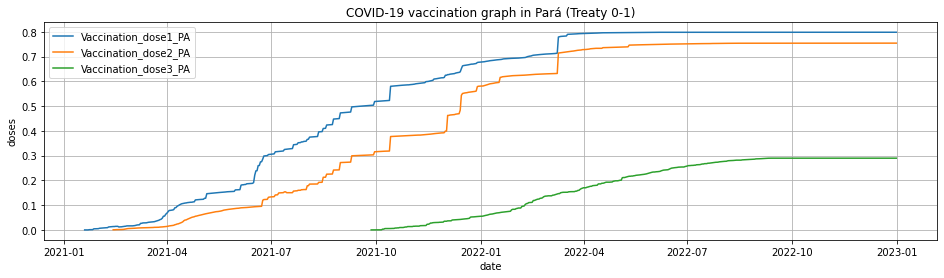

In [ ]:
# Normalização e criação de novas colunas em decimais (0=0% e 1=100%)
dados_PA_vacinados['Vacinacao_Dose1_%decimal_PA'] = dados_PA_vacinados ['Vacinacao_Dose1_PA'] * 0.01                                                               
dados_PA_vacinados['Vacinacao_Dose2_%decimal_PA'] = dados_PA_vacinados ['Vacinacao_Dose2_PA'] * 0.01
dados_PA_vacinados['Vacinacao_Dose3_%decimal_PA'] = dados_PA_vacinados ['Vacinacao_Dose3_PA'] * 0.01

# Filtrando os dados em decimais
dados_PA_vacinacao_dec = dados_PA_vacinados.filter(items = ['data',
                                                            'Vacinacao_Dose1_%decimal_PA',
                                                            'Vacinacao_Dose2_%decimal_PA',
                                                            'Vacinacao_Dose3_%decimal_PA'])

#print(dados_PA_vacinacao_dec.columns)
#dados_PA_vacinacao_dec.plot.line(title='COVID-19 vaccination graph in Pará', x="data", y=['Vacinacao_Dose1_%decimal_PA',
#                                                                                          'Vacinacao_Dose2_%decimal_PA',
#                                                                                          'Vacinacao_Dose3_%decimal_PA'], figsize=(16,4)).grid();

#Renomeano o nome  das colunas apenas para o gráfico  
plt.figure(figsize=(16, 4))
plt.grid()
plt.xlabel('date')
plt.ylabel('doses')
plt.title('COVID-19 vaccination graph in Pará (Treaty 0-1)')
plt.plot(dados_PA_vacinados['data'], dados_PA_vacinados['Vacinacao_Dose1_%decimal_PA'], label='Vaccination_dose1_PA')
plt.plot(dados_PA_vacinados['data'], dados_PA_vacinados['Vacinacao_Dose2_%decimal_PA'], label='Vaccination_dose2_PA')
plt.plot(dados_PA_vacinados['data'], dados_PA_vacinados['Vacinacao_Dose3_%decimal_PA'], label='Vaccination_dose3_PA')
plt.legend()

print(dados_PA_vacinacao_dec)   

# Salvando o frafico em PNG: 
plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/COVID-19 Vaccination graph in Pará (Treaty 0-1) - Data collected day {date.today()}.png', dpi=300, transparent=True, bbox_inches='tight')  

In [ ]:
# Tornando Data em indice:
dados_PA_vacinacao_dec = dados_PA_vacinacao_dec.set_index('data')
dados_PA_vacinacao_dec
dados_PA_vacinacao_dec

,Vacinacao_Dose1_%decimal_PA,Vacinacao_Dose2_%decimal_PA,Vacinacao_Dose3_%decimal_PA
data,,,
2020-03-18,NaN,NaN,NaN
2020-03-19,NaN,NaN,NaN
2020-03-20,NaN,NaN,NaN
2020-03-21,NaN,NaN,NaN
2020-03-22,NaN,NaN,NaN
...,...,...,...
2022-12-27,0.798519,0.754516,0.289786
2022-12-28,0.798519,0.754516,0.289786
2022-12-29,0.798519,0.754516,0.289786


#Integração dos dados

In [ ]:
#Integrando dados e imprimindo os dados
dados_unidos = pd.concat([casos_media_movel_atual,  casos_media_movel_7dias, casos_media_movel_14dias, dados_PA_vacinacao_dec], axis=1)

# obitos_media_movel_atual, obitos_media_movel_7dias, obitos_media_movel_14dias,
dados_unidos

,Casos_DataSintoma_MM_atual_PA,Casos_Publicacao_MM_atual_PA,Casos_DataSintoma_MM_7dias_PA,Casos_Publicacao_MM_7dias_PA,Casos_DataSintoma_MM_14dias_PA,Casos_Publicacao_MM_14dias_PA,Vacinacao_Dose1_%decimal_PA,Vacinacao_Dose2_%decimal_PA,Vacinacao_Dose3_%decimal_PA
data,,,,,,,,,
2020-03-01,20.571429,0.000000,20.571429,0.0,20.571429,0.0,NaN,NaN,NaN
2020-03-02,26.285714,0.000000,26.285714,0.0,26.285714,0.0,NaN,NaN,NaN
2020-03-03,35.714286,0.000000,35.714286,0.0,35.714286,0.0,NaN,NaN,NaN
2020-03-04,40.142857,0.000000,40.142857,0.0,40.142857,0.0,NaN,NaN,NaN
2020-03-05,68.000000,0.000000,68.000000,0.0,68.000000,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-27,16.571429,144.857143,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
2022-12-28,13.428571,138.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
2022-12-29,10.000000,117.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786


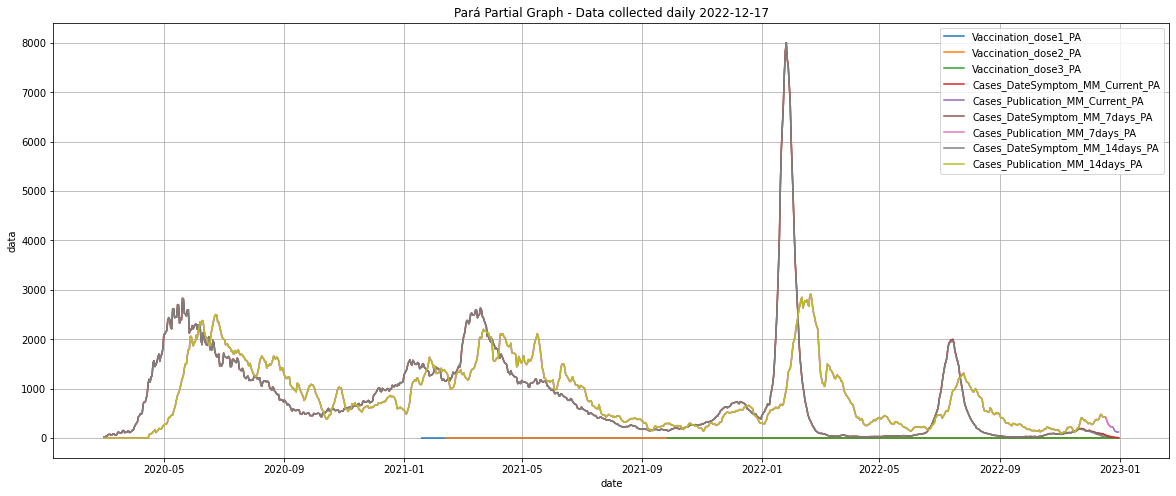

In [ ]:
# Imprimindo o grafico:

# Plotando os dados:
plt.figure(figsize=(20, 8))
plt.grid()
plt.xlabel('date')
plt.ylabel('data')
plt.title(f'Pará Partial Graph - Data collected daily {strDiaColetado}')

#VACINAÇÃO

plt.plot(dados_unidos['Vacinacao_Dose1_%decimal_PA'], label='Vaccination_dose1_PA')
plt.plot(dados_unidos['Vacinacao_Dose2_%decimal_PA'], label='Vaccination_dose2_PA')
plt.plot(dados_unidos['Vacinacao_Dose3_%decimal_PA'], label='Vaccination_dose3_PA')

#CASOS

#Dias atuais
plt.plot(dados_unidos['Casos_DataSintoma_MM_atual_PA'], label='Cases_DateSymptom_MM_Current_PA')
plt.plot(dados_unidos['Casos_Publicacao_MM_atual_PA'], label='Cases_Publication_MM_Current_PA')

#7 dias
plt.plot(dados_unidos['Casos_DataSintoma_MM_7dias_PA'], label='Cases_DateSymptom_MM_7days_PA')
plt.plot(dados_unidos['Casos_Publicacao_MM_7dias_PA'], label='Cases_Publication_MM_7days_PA')

#14 dias
plt.plot(dados_unidos['Casos_DataSintoma_MM_14dias_PA'], label='Cases_DateSymptom_MM_14days_PA')
plt.plot(dados_unidos['Casos_Publicacao_MM_14dias_PA'], label='Cases_Publication_MM_14days_PA')
plt.legend()

# Salvando o frafico em PNG: 
plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Pará Partial Graph - Data collected daily {date.today()}.png', dpi=300, transparent=True, bbox_inches='tight')  

#Exportação dos dados

In [ ]:
# Exportando dados em Excel
pasta_exportacao = "/content/drive/MyDrive/NPCA - COVID/_CASOS/DataSet/"
data_exportacao = time.localtime() 
data_exportacao_string = time.strftime("%d_%m_%Y")
dados_unidos.to_excel(pasta_exportacao+'Dataset_'+str(data_exportacao_string)+'.xlsx', index = True)

#**OBITOS**

#Leitura e visualização dos dados

##Óbitos média móvel Atual, 7 Dias, 14 Dias

In [ ]:
#Seleciona os arquivos de OBITOS recentemente baixado da pasta de .CSVs (LakeData)
pasta = '/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/' 
lista_de_arquivos_obitos = glob.glob(pasta+'*') 
print(*lista_de_arquivos_obitos, sep = '\n')

/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_23_02_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_24_02_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_25_02_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_26_02_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_27_02_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_28_02_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_01_03_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_02_03_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_03_03_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_04_03_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_05_03_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_06_03_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_07_03_2022.csv
/content/drive/MyDrive/NP

In [ ]:
# Indice dos arquivos na lista ordenada. ALTERAR NUMEROS PARA 7 E 14 QUANDO TIVERMOS AO MENOS 15 ARQUIVOS NA PASTA
indice_Setimo_dia_obitos= 7
indice_DecimoQuarto_dia_obitos = 14

# Ordena arquivos por data de criação do arquivo. Ultimo arquivo a ser criado começa no inicio da lista.
lista_de_arquivos_ordenados_obitos = sorted(lista_de_arquivos_obitos,key=os.path.getctime,reverse=True)
print(*lista_de_arquivos_ordenados_obitos,sep = "\n")

/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_31_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_30_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_29_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_28_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_27_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_26_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_25_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_24_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_23_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_22_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_21_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_20_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_19_12_2022.csv
/content/drive/MyDrive/NP

In [ ]:
# Seleciona o ultimo arquivo que foi criado e adicioado na pasta
arquivo_atual_obitos = lista_de_arquivos_ordenados_obitos[0]

# Seleciona o setimo arquivo que foi criado depois do ultimo arquivo adicionado na pasta
arquivo_7dias_obitos = lista_de_arquivos_ordenados_obitos[indice_Setimo_dia_obitos]

# Seleciona o decimo quarto arquivo que foi criado depois do ultimo arquivo adicionado na pasta
arquivo_14dias_obitos = lista_de_arquivos_ordenados_obitos[indice_DecimoQuarto_dia_obitos]

print(arquivo_atual_obitos)
print(arquivo_7dias_obitos)
print(arquivo_14dias_obitos)

/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_31_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_24_12_2022.csv
/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_17_12_2022.csv


In [ ]:
# Seleciona o decimo quarto arquivo que foi criado depois do ultimo arquivo adicionado na pasta

#arquivo_14dias_obitos = lista_de_arquivos_ordenados_obitos[20]
#print(arquivo_14dias_obitos)

In [ ]:
#df_teste = pd.read_csv('/content/drive/MyDrive/NPCA - COVID/LakeData/Óbitos/MMO_PA_31_10_2022.csv')
#df_teste

In [ ]:
#Importando arquivos
obitos_media_movel_atual = pd.read_csv(arquivo_atual_obitos, parse_dates=['data'])
obitos_media_movel_atual.info()

obitos_media_movel_7dias = pd.read_csv(arquivo_7dias_obitos, parse_dates=['data'])
obitos_media_movel_7dias.info()

obitos_media_movel_14dias = pd.read_csv(arquivo_14dias_obitos, parse_dates=['data'])
obitos_media_movel_14dias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   data                          1036 non-null   datetime64[ns, pytz.FixedOffset(-180)]
 1   Qtd. pela data do óbito       1036 non-null   float64                               
 2   Qtd. pela data da publicação  1036 non-null   float64                               
dtypes: datetime64[ns, pytz.FixedOffset(-180)](1), float64(2)
memory usage: 24.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   data                          1029 non-null   datetime64[ns, pytz.Fix

##Porcentagem de vacinação: primeira, segunda e terceira dose.

            data  Vacinacao_Dose1_PA  Vacinacao_Dose2_PA  Vacinacao_Dose3_PA
176   2020-03-18                 NaN                 NaN                 NaN
198   2020-03-19                 NaN                 NaN                 NaN
224   2020-03-20                 NaN                 NaN                 NaN
251   2020-03-21                 NaN                 NaN                 NaN
279   2020-03-22                 NaN                 NaN                 NaN
...          ...                 ...                 ...                 ...
28559 2022-12-27             79.8519            75.45159            28.97859
28587 2022-12-28             79.8519            75.45159            28.97859
28615 2022-12-29             79.8519            75.45159            28.97859
28643 2022-12-30             79.8519            75.45159            28.97859
28671 2022-12-31             79.8519            75.45159            28.97859

[1019 rows x 4 columns]


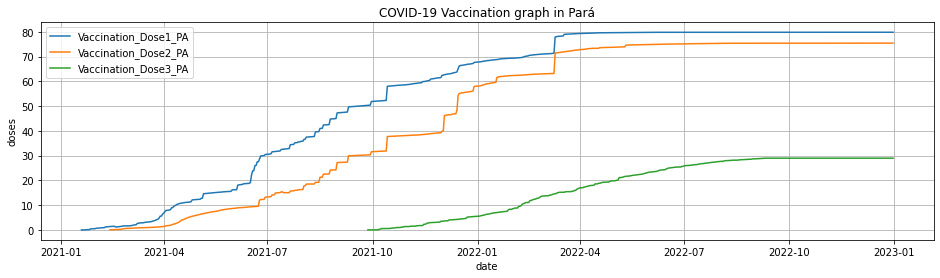

In [ ]:
# importando os dados da COVID diretamente do GitHub
dados = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

# alterar a coluna de data para o formato de data e hora
dados['date'] = pd.to_datetime(dados['date'])

# Filtrando os dados do Braisl, e mostrando apenas as colunas especificas
dados_PA_vacinados = dados.query("state == 'PA'")[['date', 
                                                   'vaccinated_per_100_inhabitants',
                                                   'vaccinated_second_per_100_inhabitants',
                                                   'vaccinated_third_per_100_inhabitants']]

dados_PA_vacinados.columns=['data','Vacinacao_Dose1_PA','Vacinacao_Dose2_PA','Vacinacao_Dose3_PA']

# imprimindo todas as colunas disponiveis
#print(dados.columns)

# Plotando os dados
#dados_PA_vacinados.plot.line(title='Vaccination doses in Pará', x="data", y= ['Vacinacao_Dose1_PA',
#                                                                              'Vacinacao_Dose2_PA',
#     
#                                                                         'Vacinacao_Dose3_PA'], figsize=(16,4)).grid(); 
plt.figure(figsize=(16, 4))
plt.grid()
plt.xlabel('date')
plt.ylabel('doses')
plt.title('COVID-19 Vaccination graph in Pará')
plt.plot(dados_PA_vacinados['data'], dados_PA_vacinados['Vacinacao_Dose1_PA'], label='Vaccination_Dose1_PA')
plt.plot(dados_PA_vacinados['data'], dados_PA_vacinados['Vacinacao_Dose2_PA'], label='Vaccination_Dose2_PA')
plt.plot(dados_PA_vacinados['data'], dados_PA_vacinados['Vacinacao_Dose3_PA'], label='Vaccination_Dose3_PA')
plt.legend()

# Imprimindo o dataframe:
print(dados_PA_vacinados)  

# Salvando o gráfico em PNG:
plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Vaccination doses in Pará - Data collected day {date.today()}.png', dpi=300, transparent=True, bbox_inches='tight')
                                                                                     

# Tratamento dos dados


##Tratamento para obitos média móvel 

            Obitos_DataOcorrencia_MM_atual_PA  Obitos_Publicacao_MM_atual_PA
data                                                                        
2020-03-01                                0.0                       0.000000
2020-03-02                                0.0                       0.000000
2020-03-03                                0.0                       0.000000
2020-03-04                                0.0                       0.000000
2020-03-05                                0.0                       0.000000
...                                       ...                            ...
2022-12-27                                0.0                       1.285714
2022-12-28                                0.0                       1.428571
2022-12-29                                0.0                       1.142857
2022-12-30                                0.0                       1.142857
2022-12-31                                0.0                       1.142857

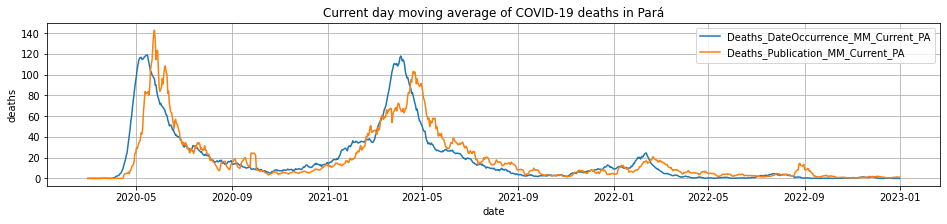

In [ ]:
#         PARA O DIA ATUAL - OBITOS

# Filtrando apenas a data e retirando o horario
obitos_media_movel_atual['data'] = pd.to_datetime(obitos_media_movel_atual['data'].dt.strftime('%Y-%m-%d'))

# Tornando Data em indice:
obitos_media_movel_atual = obitos_media_movel_atual.set_index('data')

#Alterando nome das colunas
obitos_media_movel_atual = obitos_media_movel_atual.rename(columns={"Qtd. pela data do óbito":"Obitos_DataOcorrencia_MM_atual_PA","Qtd. pela data da publicação":"Obitos_Publicacao_MM_atual_PA"}) 
                                                                                               
# Plotando os dados:
strDiaColetado = str(obitos_media_movel_atual.index[-1])
strDiaColetado = strDiaColetado.split(" ")[0]
#obitos_media_movel_atual.plot.line(title=f'Moving average of deaths from COVID-19 in Pará - Data collected day {strDiaColetado}', figsize=(16,3)).grid()

# Plotando os dados:
plt.figure(figsize=(16, 3))
plt.grid()
plt.xlabel('date')
plt.ylabel('deaths')
#plt.title(f'Current day moving average of COVID-19 deaths in Pará - Data collected day {strDiaColetado}')
plt.title(f'Current day moving average of COVID-19 deaths in Pará')
plt.plot(obitos_media_movel_atual['Obitos_DataOcorrencia_MM_atual_PA'], label='Deaths_DateOccurrence_MM_Current_PA')
plt.plot(obitos_media_movel_atual['Obitos_Publicacao_MM_atual_PA'], label='Deaths_Publication_MM_Current_PA')
plt.legend()

print(obitos_media_movel_atual) 

# Salvando o frafico em PNG: 
plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Moving average of deaths from COVID-19 in Pará - Data collected day {strDiaColetado}.png', dpi=300, transparent=True, bbox_inches='tight')
#plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Moving average of deaths from COVID-19 in Pará - Data collected day {date.today()}.png', dpi=300, transparent=True, bbox_inches='tight')

            Obitos_DataOcorrencia_MM_7dias_PA  Obitos_Publicacao_MM_7dias_PA
data                                                                        
2020-03-01                           0.000000                       0.000000
2020-03-02                           0.000000                       0.000000
2020-03-03                           0.000000                       0.000000
2020-03-04                           0.000000                       0.000000
2020-03-05                           0.000000                       0.000000
...                                       ...                            ...
2022-12-20                           0.142857                       0.714286
2022-12-21                           0.000000                       0.571429
2022-12-22                           0.000000                       0.857143
2022-12-23                           0.000000                       1.000000
2022-12-24                           0.000000                       1.000000

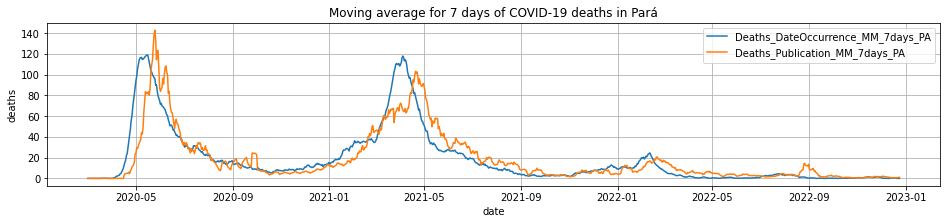

In [ ]:
#         PARA 7 DIAS - OBITOS

# Filtrando apenas a data e retirando o horario
obitos_media_movel_7dias['data'] = pd.to_datetime(obitos_media_movel_7dias['data'].dt.strftime('%Y-%m-%d'))

# Tornando Data em indice:
obitos_media_movel_7dias = obitos_media_movel_7dias.set_index('data')


#Alterando nome das colunas
obitos_media_movel_7dias = obitos_media_movel_7dias.rename(columns={"Qtd. pela data do óbito":"Obitos_DataOcorrencia_MM_7dias_PA","Qtd. pela data da publicação":"Obitos_Publicacao_MM_7dias_PA"})

# Plotando os dados:
strDiaColetado = str(obitos_media_movel_7dias.index[-1])
strDiaColetado = strDiaColetado.split(" ")[0]
#obitos_media_movel_7dias.plot.line(title=f'Moving average of deaths from COVID-19 in Pará - Data collected day {strDiaColetado}', figsize=(16,3)).grid()

# Plotando os dados:
plt.figure(figsize=(16, 3))
plt.grid()
plt.xlabel('date')
plt.ylabel('deaths')
#plt.title(f'Moving average for 7 days of COVID-19 deaths in Pará - Data collected day {strDiaColetado}')
plt.title(f'Moving average for 7 days of COVID-19 deaths in Pará')
plt.plot(obitos_media_movel_7dias['Obitos_DataOcorrencia_MM_7dias_PA'], label='Deaths_DateOccurrence_MM_7days_PA')
plt.plot(obitos_media_movel_7dias['Obitos_Publicacao_MM_7dias_PA'], label='Deaths_Publication_MM_7days_PA')
plt.legend()

print(obitos_media_movel_7dias)

# Salvando o frafico em PNG: 
plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Moving average for 7 days of deaths from COVID-19 in Pará - Data collected day {strDiaColetado}.png', dpi=300, transparent=True, bbox_inches='tight')
#plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Moving average for 7 days of deaths from COVID-19 in Pará - Data collected day {date.today()}.png', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
#df_teste = pd.read_csv('/content/drive/MyDrive/NPCA - COVID/')
#df_teste

            Obitos_DataOcorrencia_MM_14dias_PA  Obitos_Publicacao_MM_14dias_PA
data                                                                          
2020-03-01                            0.000000                        0.000000
2020-03-02                            0.000000                        0.000000
2020-03-03                            0.000000                        0.000000
2020-03-04                            0.000000                        0.000000
2020-03-05                            0.000000                        0.000000
...                                        ...                             ...
2022-12-13                            0.142857                        0.714286
2022-12-14                            0.142857                        0.714286
2022-12-15                            0.142857                        0.571429
2022-12-16                            0.142857                        0.714286
2022-12-17                            0.142857      

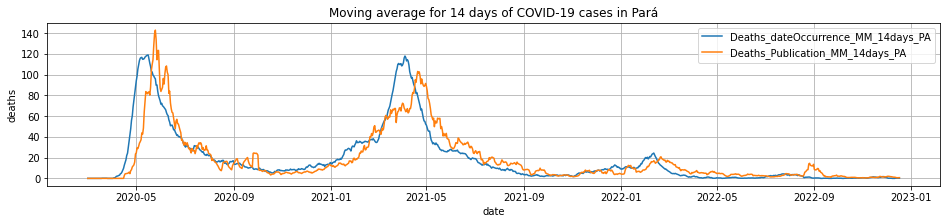

In [ ]:
#         PARA 14 DIAS - OBITOS

# Filtrando apenas a data e retirando o horario
obitos_media_movel_14dias['data'] = pd.to_datetime(obitos_media_movel_14dias['data'].dt.strftime('%Y-%m-%d'))

# Tornando Data em indice:
obitos_media_movel_14dias = obitos_media_movel_14dias.set_index('data')

#Alterando nome das colunas
obitos_media_movel_14dias = obitos_media_movel_14dias.rename(columns={"Qtd. pela data do óbito":"Obitos_DataOcorrencia_MM_14dias_PA","Qtd. pela data da publicação":"Obitos_Publicacao_MM_14dias_PA"})

# Plotando os dados:
strDiaColetado = str(obitos_media_movel_14dias.index[-1])
strDiaColetado = strDiaColetado.split(" ")[0]
#obitos_media_movel_14dias.plot.line(title=f'Moving average of deaths from COVID-19 in Pará - Data collected day {strDiaColetado}', figsize=(16,3)).grid()

# Plotando os dados:
plt.figure(figsize=(16, 3))
plt.grid()
plt.xlabel('date')
plt.ylabel('deaths')
#plt.title(f'Moving average for 14 days of COVID-19 cases in Pará - Data collected day {strDiaColetado}')
plt.title(f'Moving average for 14 days of COVID-19 cases in Pará')
plt.plot(obitos_media_movel_14dias['Obitos_DataOcorrencia_MM_14dias_PA'], label='Deaths_dateOccurrence_MM_14days_PA')
plt.plot(obitos_media_movel_14dias['Obitos_Publicacao_MM_14dias_PA'], label='Deaths_Publication_MM_14days_PA')
plt.legend()                                                                                                 

print(obitos_media_movel_14dias) 

# Salvando o frafico em PNG: 
plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Moving average for 14 days of deaths from COVID-19 in Pará - Data collected day {strDiaColetado}.png', dpi=300, transparent=True, bbox_inches='tight')
#plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Moving average for 14 days of deaths from COVID-19 in Pará - Data collected day {date.today()}.png', dpi=300, transparent=True, bbox_inches='tight')

## Ocultar

In [ ]:
#         PARA O DIA ATUAL OBITOS

# Filtrando apenas a data e retirando o horario
#obitos_media_movel_atual['data'] = pd.to_datetime(obitos_media_movel_atual['data'].dt.strftime('%Y-%m-%d'))

# Tornando Data em indice:
#obitos_media_movel_atual = obitos_media_movel_atual.set_index('data')

#Alterando nome das colunas
#obitos_media_movel_atual = obitos_media_movel_atual.rename(columns={"Qtd. pela data do óbito":"Obitos_DataOcorrencia_MM_atual_PA","Qtd. pela data da publicação":"Obitos_Publicacao_MM_atual_PA"}) 

# Plotando os dados:
#strDiaColetado = str(obitos_media_movel_atual.index[-1])
#strDiaColetado = strDiaColetado.split(" ")[0]
#obitos_media_movel_atual.plot.line(title=f'Moving average of deaths from COVID-19 in Pará - Data collected day {strDiaColetado}', figsize=(16,3)).grid()

####################################################################################################################################################################################################################################################################

#         PARA 7 DIAS

# Filtrando apenas a data e retirando o horario
#obitos_media_movel_7dias['data'] = pd.to_datetime(obitos_media_movel_7dias['data'].dt.strftime('%Y-%m-%d'))

# Tornando Data em indice:
#obitos_media_movel_7dias = obitos_media_movel_7dias.set_index('data')

#Alterando nome das colunas
#obitos_media_movel_7dias = obitos_media_movel_7dias.rename(columns={"Qtd. pela data do óbito":"Obitos_DataOcorrencia_MM_7dias_PA","Qtd. pela data da publicação":"Obitos_DataPublicacao_MM_7dias_PA"})

# Plotando os dados:
#strDiaColetado = str(obitos_media_movel_7dias.index[-1])
#strDiaColetado = strDiaColetado.split(" ")[0]
#obitos_media_movel_7dias.plot.line(title=f'Moving average of deaths from COVID-19 in Pará - Data collected day {strDiaColetado}', figsize=(16,3)).grid()

####################################################################################################################################################################################################################################################################

#         PARA 14 DIAS

# Filtrando apenas a data e retirando o horario
#obitos_media_movel_14dias['data'] = pd.to_datetime(obitos_media_movel_14dias['data'].dt.strftime('%Y-%m-%d'))

# Tornando Data em indice:
#obitos_media_movel_14dias = obitos_media_movel_14dias.set_index('data')

#Alterando nome das colunas
#obitos_media_movel_14dias = obitos_media_movel_14dias.rename(columns={"Qtd. pela data do óbito":"Obito_DataOcorrencia_MM_14dias_PA","Qtd. pela data da publicação":"Obitos_DataPublicacao_MM_14dias_PA"})

# Plotando os dados:
#strDiaColetado = str(obitos_media_movel_14dias.index[-1])
#strDiaColetado = strDiaColetado.split(" ")[0]
#obitos_media_movel_14dias.plot.line(title=f'Moving average of deaths from COVID-19 in Pará - Data collected day {strDiaColetado}', figsize=(16,3)).grid()

                                                                                                    #Tradução para inglês
                                                                                                    #Moving average of deaths from COVID-19 in Pará - Data collected day

##Tratamento de vacinação 


            data  Vacinacao_Dose1_%decimal_PA  Vacinacao_Dose2_%decimal_PA  \
176   2020-03-18                          NaN                          NaN   
198   2020-03-19                          NaN                          NaN   
224   2020-03-20                          NaN                          NaN   
251   2020-03-21                          NaN                          NaN   
279   2020-03-22                          NaN                          NaN   
...          ...                          ...                          ...   
28559 2022-12-27                     0.798519                     0.754516   
28587 2022-12-28                     0.798519                     0.754516   
28615 2022-12-29                     0.798519                     0.754516   
28643 2022-12-30                     0.798519                     0.754516   
28671 2022-12-31                     0.798519                     0.754516   

       Vacinacao_Dose3_%decimal_PA  
176                       

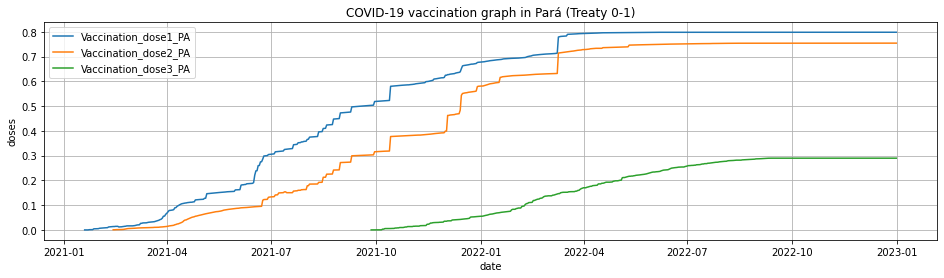

In [ ]:
# Normalização e criação de novas colunas em decimais (0=0% e 1=100%)
dados_PA_vacinados['Vacinacao_Dose1_%decimal_PA'] = dados_PA_vacinados ['Vacinacao_Dose1_PA'] * 0.01                                                                     
dados_PA_vacinados['Vacinacao_Dose2_%decimal_PA'] = dados_PA_vacinados ['Vacinacao_Dose2_PA'] * 0.01
dados_PA_vacinados['Vacinacao_Dose3_%decimal_PA'] = dados_PA_vacinados ['Vacinacao_Dose3_PA'] * 0.01


# Filtrando os dados em decimais
dados_PA_vacinacao_dec = dados_PA_vacinados.filter(items = ['data',
                                                            'Vacinacao_Dose1_%decimal_PA',
                                                            'Vacinacao_Dose2_%decimal_PA',
                                                            'Vacinacao_Dose3_%decimal_PA'])

#dados_PA_vacinacao_dec.plot.line(title='COVID-19 vaccination graph in Pará (Treaty 0-1)', x="data", y=['Vacinacao_Dose1_%decimal_PA',
#                                                                                          'Vacinacao_Dose2_%decimal_PA',
#                                                                                          'Vacinacao_Dose3_%decimal_PA',], figsize=(16,4)).grid();

#Renomeano o nome  das colunas apenas para o gráfico  
plt.figure(figsize=(16, 4))
plt.grid()
plt.xlabel('date')
plt.ylabel('doses')
plt.title('COVID-19 vaccination graph in Pará (Treaty 0-1)')
plt.plot(dados_PA_vacinados['data'], dados_PA_vacinados['Vacinacao_Dose1_%decimal_PA'], label='Vaccination_dose1_PA')
plt.plot(dados_PA_vacinados['data'], dados_PA_vacinados['Vacinacao_Dose2_%decimal_PA'], label='Vaccination_dose2_PA')
plt.plot(dados_PA_vacinados['data'], dados_PA_vacinados['Vacinacao_Dose3_%decimal_PA'], label='Vaccination_dose3_PA')
plt.legend()

# Imprimindo as DataFrame
print(dados_PA_vacinacao_dec)    

# Salvando o frafico em PNG: 
plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/COVID-19 Vaccination graph in Pará (Treaty 0-1) - Data collected day {date.today()}.png', dpi=300, transparent=True, bbox_inches='tight')  

In [ ]:
# Tornando Data em indice:
dados_PA_vacinacao_dec = dados_PA_vacinacao_dec.set_index('data')
dados_PA_vacinacao_dec                                                                                            

,Vacinacao_Dose1_%decimal_PA,Vacinacao_Dose2_%decimal_PA,Vacinacao_Dose3_%decimal_PA
data,,,
2020-03-18,NaN,NaN,NaN
2020-03-19,NaN,NaN,NaN
2020-03-20,NaN,NaN,NaN
2020-03-21,NaN,NaN,NaN
2020-03-22,NaN,NaN,NaN
...,...,...,...
2022-12-27,0.798519,0.754516,0.289786
2022-12-28,0.798519,0.754516,0.289786
2022-12-29,0.798519,0.754516,0.289786


#Integração dos dados OBITOS, CASOS E VACINAÇÃO

In [ ]:
#Integrando dados e imprimindo os dados
dados_unidos = pd.concat([obitos_media_movel_atual, obitos_media_movel_7dias, obitos_media_movel_14dias,
                          casos_media_movel_atual,  casos_media_movel_7dias, casos_media_movel_14dias,
                          dados_PA_vacinacao_dec], axis=1)

dados_unidos

,Obitos_DataOcorrencia_MM_atual_PA,Obitos_Publicacao_MM_atual_PA,Obitos_DataOcorrencia_MM_7dias_PA,Obitos_Publicacao_MM_7dias_PA,Obitos_DataOcorrencia_MM_14dias_PA,Obitos_Publicacao_MM_14dias_PA,Casos_DataSintoma_MM_atual_PA,Casos_Publicacao_MM_atual_PA,Casos_DataSintoma_MM_7dias_PA,Casos_Publicacao_MM_7dias_PA,Casos_DataSintoma_MM_14dias_PA,Casos_Publicacao_MM_14dias_PA,Vacinacao_Dose1_%decimal_PA,Vacinacao_Dose2_%decimal_PA,Vacinacao_Dose3_%decimal_PA
data,,,,,,,,,,,,,,,
2020-03-01,0.0,0.000000,0.0,0.0,0.0,0.0,20.571429,0.000000,20.571429,0.0,20.571429,0.0,NaN,NaN,NaN
2020-03-02,0.0,0.000000,0.0,0.0,0.0,0.0,26.285714,0.000000,26.285714,0.0,26.285714,0.0,NaN,NaN,NaN
2020-03-03,0.0,0.000000,0.0,0.0,0.0,0.0,35.714286,0.000000,35.714286,0.0,35.714286,0.0,NaN,NaN,NaN
2020-03-04,0.0,0.000000,0.0,0.0,0.0,0.0,40.142857,0.000000,40.142857,0.0,40.142857,0.0,NaN,NaN,NaN
2020-03-05,0.0,0.000000,0.0,0.0,0.0,0.0,68.000000,0.000000,68.000000,0.0,68.000000,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0.0,1.285714,NaN,NaN,NaN,NaN,16.571429,144.857143,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
2022-12-28,0.0,1.428571,NaN,NaN,NaN,NaN,13.428571,138.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786
2022-12-29,0.0,1.142857,NaN,NaN,NaN,NaN,10.000000,117.571429,NaN,NaN,NaN,NaN,0.798519,0.754516,0.289786


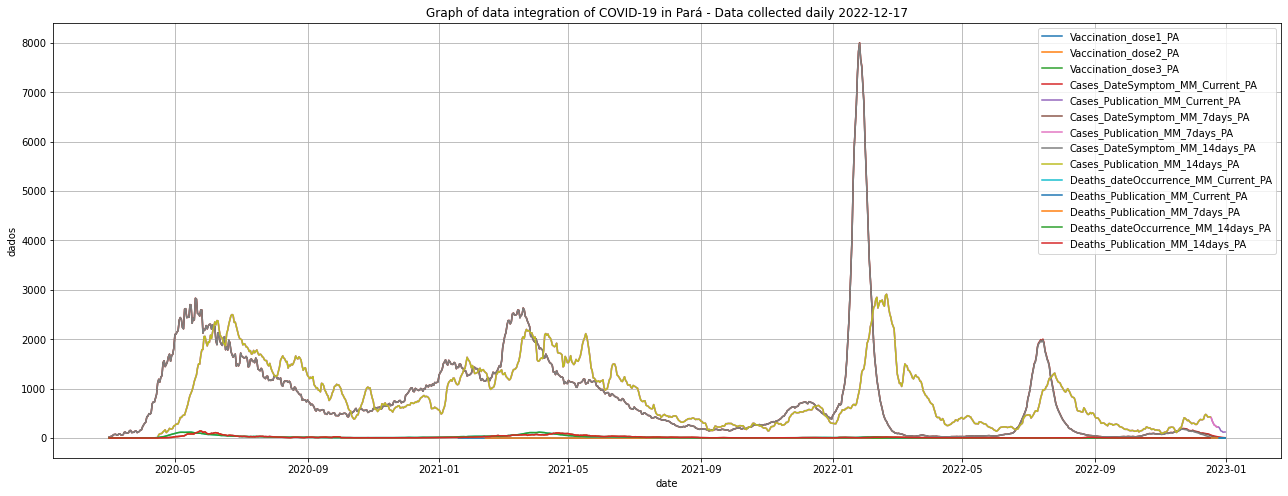

In [ ]:
# Imprimindo o grafico:

# Plotando os dados:
plt.figure(figsize=(22, 8))
plt.grid()
plt.xlabel('date')
plt.ylabel('dados')
plt.title(f'Graph of data integration of COVID-19 in Pará - Data collected daily {strDiaColetado}')

#VACINAÇÃO

plt.plot(dados_unidos['Vacinacao_Dose1_%decimal_PA'], label='Vaccination_dose1_PA')
plt.plot(dados_unidos['Vacinacao_Dose2_%decimal_PA'], label='Vaccination_dose2_PA')
plt.plot(dados_unidos['Vacinacao_Dose3_%decimal_PA'], label='Vaccination_dose3_PA')

#CASOS

#Dias atuais
plt.plot(dados_unidos['Casos_DataSintoma_MM_atual_PA'], label='Cases_DateSymptom_MM_Current_PA')
plt.plot(dados_unidos['Casos_Publicacao_MM_atual_PA'], label='Cases_Publication_MM_Current_PA')

#7 dias
plt.plot(dados_unidos['Casos_DataSintoma_MM_7dias_PA'], label='Cases_DateSymptom_MM_7days_PA')
plt.plot(dados_unidos['Casos_Publicacao_MM_7dias_PA'], label='Cases_Publication_MM_7days_PA')

#14 dias
plt.plot(dados_unidos['Casos_DataSintoma_MM_14dias_PA'], label='Cases_DateSymptom_MM_14days_PA')
plt.plot(dados_unidos['Casos_Publicacao_MM_14dias_PA'], label='Cases_Publication_MM_14days_PA')

#OBITOS

#Dia atual
plt.plot(dados_unidos['Obitos_DataOcorrencia_MM_atual_PA'], label='Deaths_dateOccurrence_MM_Current_PA')
plt.plot(dados_unidos['Obitos_Publicacao_MM_atual_PA'], label='Deaths_Publication_MM_Current_PA')

#7 dias
#plt.plot(dados_unidos['Obitos_DataOcorrencia_MM_7dias_PA'], label='Deaths_dateOccurrence_MM_7days_PA')
plt.plot(dados_unidos['Obitos_Publicacao_MM_7dias_PA'], label='Deaths_Publication_MM_7days_PA')

#14 dias
plt.plot(dados_unidos['Obitos_DataOcorrencia_MM_14dias_PA'], label='Deaths_dateOccurrence_MM_14days_PA')
plt.plot(dados_unidos['Obitos_Publicacao_MM_14dias_PA'], label='Deaths_Publication_MM_14days_PA')
plt.legend()
                                                                                                  
# Salvando o frafico em PNG: 
plt.savefig(f'/content/drive/MyDrive/NPCA - COVID/Graficos/Graph of data integration of COVID-19 in Pará - Data collected daily {date.today()}.png', dpi=300, transparent=True, bbox_inches='tight')  

# Exportação dos dados

In [ ]:
# Exportando dados em Excel
pasta_exportacao = "/content/drive/MyDrive/NPCA - COVID/_OBITOS/DataSet/"
data_exportacao = time.localtime() 
data_exportacao_string = time.strftime("%d_%m_%Y")
dados_unidos.to_excel(pasta_exportacao+'Dataset_'+str(data_exportacao_string)+'.xlsx', index = True)

Continua no script de INVESTIGAR OS DADOS.

Link:  https://colab.research.google.com/drive/1_Yk77j6wZjSCwAgtUkbSHgT-xWrdSmL3#scrollTo=NJC8mlZdv95Z